<h1>Clustering Introduction With Random Data</h1>

### Supervised vs unsupervised methods

In **supervised methods**, we start with data that has already been labeled. Then we learn from those labels, and extend what we learn to new data.
    * Classification is a supervised method.

In **unsupervised methods**, we start with data that is unlabeled. We find structure in the data, and then we try to make sense of that structure.

Clearly unsupervised methods are more cool.

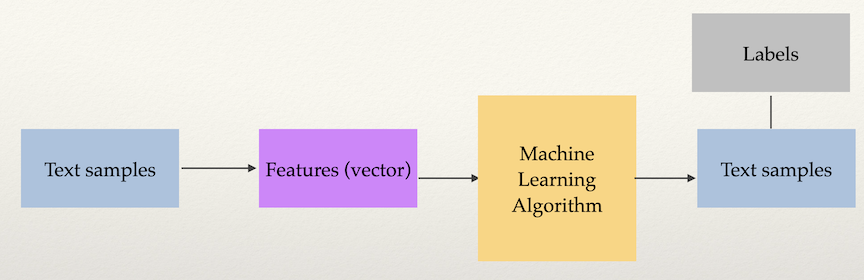

## Clustering

Clustering is a type of unsupervised methods and it's where we'll start.

### Create some random data: Points on a plane

We're not going to start with text data. We're going to start with some simpler data.

In [1]:
import matplotlib.pyplot as plt
def scatter_plot(dvectors, dnames = []):
    plt.axhline(xmin = -1, xmax = 1)
    plt.axvline(ymin = -1, ymax = 1)
    plt.grid(True)
    plt.axis('on')
    xvals = []
    yvals = []
    if dnames == []:
        # alphabet = 'abcdefghijklmnopqrstuvwxyz'
        # alphalist = list(alphabet)
        dnames = range(len(dvectors))
    for d in dvectors:
        xvals.append(d[0])
        yvals.append(d[1])
    plt.scatter(xvals, yvals)
    for i in range(len(dnames)):
        loc = [dvectors[i][0] + .02, dvectors[i][1] + .02]
        plt.annotate(dnames[i], loc, size = "large")

In [ ]:
from sklearn.datasets import make_blobs
Xtest, y = make_blobs(n_samples=10, centers=3, n_features=2, shuffle=True, random_state=42)
scatter_plot(Xtest)

## Hierarachical clustering

We are going to start with agglomerative clustering, which produces a sequence of candidate clusterings.

This is how it works. 

1. Find the two points that are closest together.
2. Assign these two points to a new cluster.
3. Replace the two points with their average (centroid).
4. Go back to step 1 and iterate until everything is in one big cluster.

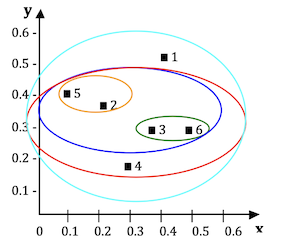

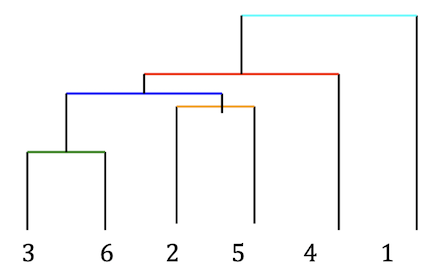

### Do the clustering

**We'll use sklearn**

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clusterer = AgglomerativeClustering(n_clusters=3, linkage="average")
clusterer.fit(Xtest)

In [ ]:
clusterer.labels_

In [5]:
import matplotlib.pyplot as plt

# Assuming you have 2D data
def plot_clusters(X, clustering, centroids):
    plt.figure(figsize=(7, 5))
    
    # Plot each data point
    plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='viridis')
    
    # Plot each centroid
    if len(centroids) > 0:
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
    
    dnames = range(len(X))
    for i in range(len(dnames)):
        loc = [X[i][0] + .02, X[i][1] + .02]
        plt.annotate(dnames[i], loc, size = "large")
    plt.show()

In [ ]:
plot_clusters(Xtest, clusterer, [])

We will often want to look at the centroids of each cluster.

Let's find and plot them.

In [7]:
import numpy as np
def get_centroids(X, clustering):
    n_clusters = clustering.n_clusters_
    centroids = np.zeros((n_clusters, X.shape[1]))
    for cluster_id in range(n_clusters):
        centroids[cluster_id] = X[clustering.labels_ == cluster_id].mean(axis=0)
    return centroids

In [8]:
centroids = get_centroids(Xtest, clusterer)

In [ ]:
plot_clusters(Xtest, clusterer, centroids)

In [10]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import numpy as np

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
plot_dendrogram(clusterer)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(Xtest, clusterer.labels_)

## Kmeans clustering

This is another clustering algorithm we can swap in.

How it works:

1. It randomly picks a number of points equal to the number of clusters. These are the first guesses at centers for the clusters.
2. Each sample in the data set is assigned to the cluster corresponding to the center to which it is closest.
3. Find the average of the points in each cluster. These become the new centers.
4. The process iterates it converges within some measure of tolerance.

In [13]:
from sklearn.cluster import KMeans
kclusterer = KMeans(n_clusters=3).fit(Xtest)

In [ ]:
kclusterer.labels_

In [15]:
centroids = kclusterer.cluster_centers_

In [ ]:
scatter_plot(centroids)

## Determining the right number of clusters

In [17]:
def compute_rss(X, centroids, labels):
    rss = 0
    for dnum in range(X.shape[0]):
        vec = X[dnum]
        centroid = centroids[labels[dnum]]
        res_vec = vec - centroid
        rss += np.dot(res_vec, res_vec)
    return rss

def compute_rss_data(kclusterer, X, start, end):
    results = []
    for k in range(start, end):
        kcluster = KMeans(n_clusters=k)
        kcluster.fit(X)
        centroids = kcluster.cluster_centers_
        labels = kcluster.labels_
        rss = compute_rss(X, centroids, labels)
        results.append([k, rss])
    return results

In [18]:
rss_list = compute_rss_data(kclusterer, Xtest, 2, 10)

In [ ]:
plt.clf()
x = [res[0] for res in rss_list]
y = [res[1] for res in rss_list]
plt.plot(x, y)